In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('top_10_sales_data.csv')
df['sales_date']=pd.to_datetime(df['sales_date'])
df.head()

,sales_date,product_id,quantity,total_price,employee_id,customer_id,month,year,days_of_week
0,2023-01-01,437,5,10.0,138,82477,1,2023,Sunday
1,2023-01-01,437,3,6.0,26,46458,1,2023,Sunday
2,2023-01-01,298,6,39.6,7,48576,1,2023,Sunday
3,2023-01-01,120,1,16.9,236,48803,1,2023,Sunday
4,2023-01-01,448,3,57.6,9,95087,1,2023,Sunday


In [7]:
if 'days_of_week' in df.columns:
    df.rename(columns={'days_of_week': 'day_of_week'}, inplace=True)
elif 'day_of_week' not in df.columns:
    df['day_of_week'] = df['sales_date'].dt.day_name()

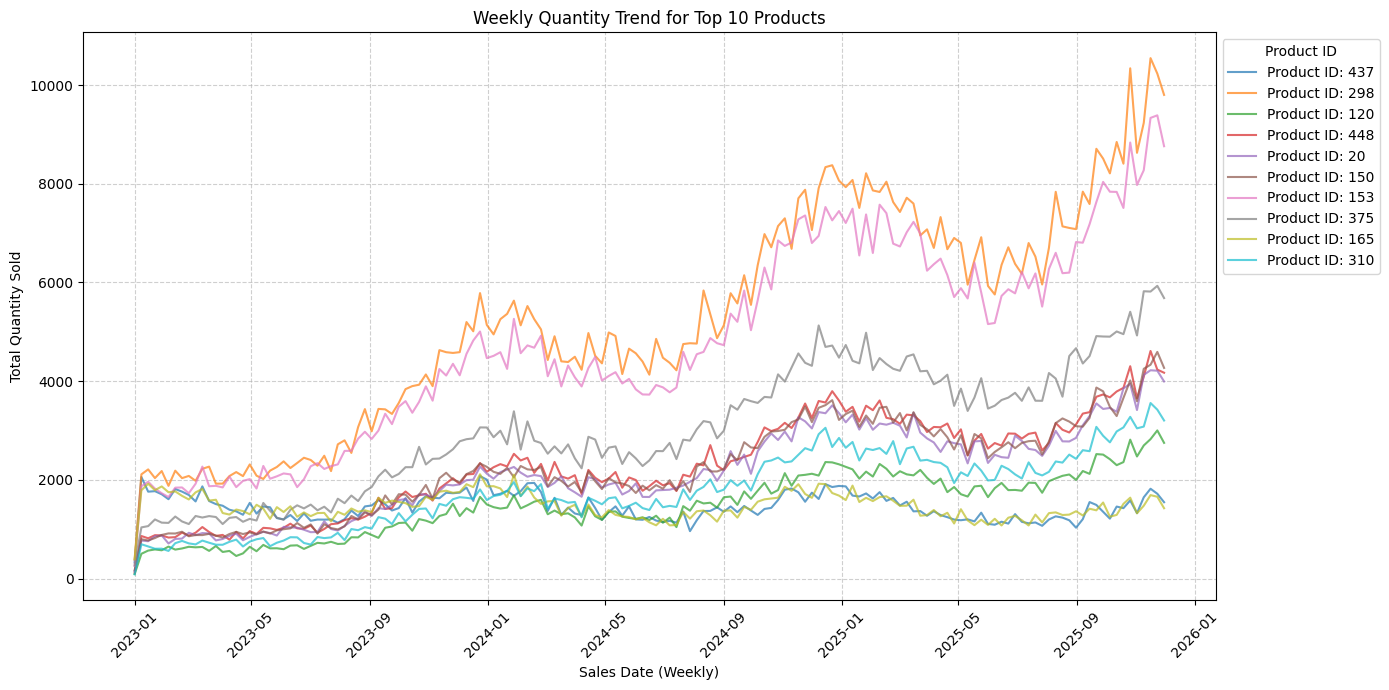

In [ ]:
weekly_trend = df.groupby('product_id').resample('W', on='sales_date')['quantity'].sum().reset_index()

plt.figure(figsize=(14, 7))
top_10_ids = df['product_id'].unique()

for product_id in top_10_ids:
    product_data = weekly_trend[weekly_trend['product_id'] == product_id]
    plt.plot(product_data['sales_date'], product_data['quantity'], label=f'Product ID: {product_id}', alpha=0.7)

plt.title('Weekly Quantity Trend for Top 10 Products')
plt.xlabel('Sales Date (Weekly)')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product ID', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

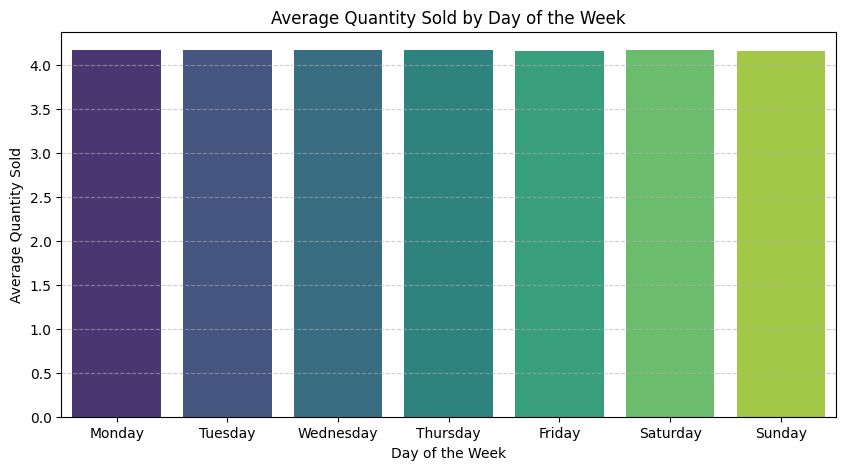

In [10]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg_quantity = df.groupby('day_of_week')['quantity'].mean().reindex(day_order).reset_index()
day_avg_quantity.rename(columns={'quantity': 'average_quantity_sold'}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='average_quantity_sold', data=day_avg_quantity, hue='day_of_week', palette='viridis', legend=False)

plt.title('Average Quantity Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Quantity Sold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

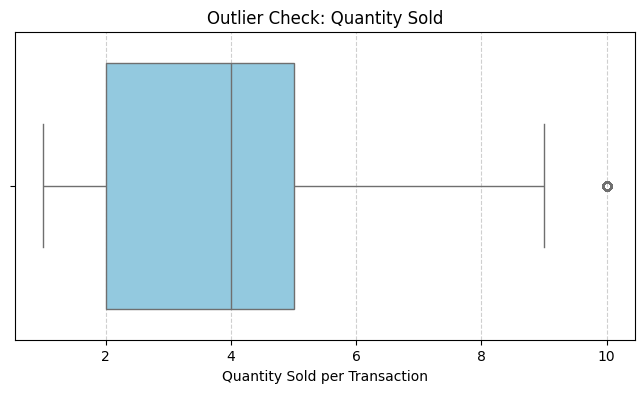

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['quantity'], color='skyblue') 
plt.title('Outlier Check: Quantity Sold')
plt.xlabel('Quantity Sold per Transaction')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

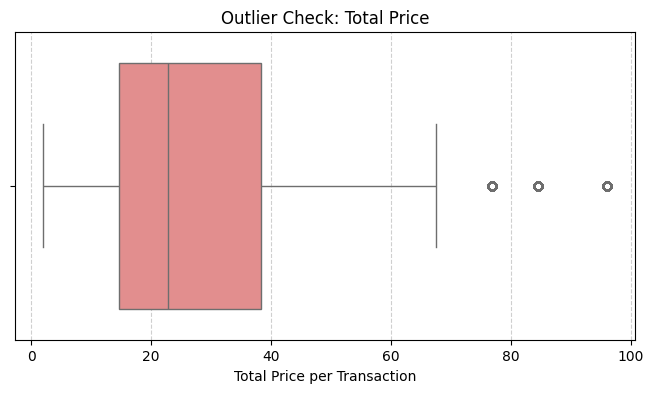

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['total_price'], color='lightcoral')
plt.title('Outlier Check: Total Price')
plt.xlabel('Total Price per Transaction')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()